<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 7 -- Generative models II </h2>
<h2 style="color:rgb(0,120,170)">Generative Adversarial Networks - program the generator network </h2>

In [1]:
from u7_utils import *

In [2]:
torch.__version__

'1.3.1+cpu'

## MNIST dataset
We will again concentrate on the MNIST dataset.
<h1 style="color:rgb(208,90,80)">Copy the *data* folder from last week into this folder. In this way, you do not have to download the MNIST dataset again! </h1>

In [3]:
# Hyperparameters
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=3,
                       lr=0.001, momentum=0.5, seed=1, log_interval=100,
                      weight_decay = 1e-5)
torch.manual_seed(args.seed)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [4]:
if not os.path.exists(os.path.join('.','samples')):
    os.makedirs(os.path.join('.','samples'))

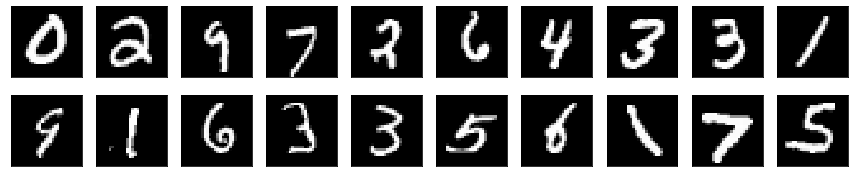

In [5]:
train_loader, test_loader = get_MNIST_data_normalized(args, use_cuda)
display_MNIST(train_loader)

In [6]:
input_dim = train_loader.dataset.data.shape[1]*train_loader.dataset.data.shape[2]
nr_datapoints = args.test_batch_size
hidden_dim = 4
print("The input dimension is {}.".format(input_dim))
print("The number of datapoints for visualization is {}.".format(nr_datapoints))
print("The hidden dimension is {}.".format(hidden_dim))

The input dimension is 784.
The number of datapoints for visualization is 1000.
The hidden dimension is 4.


## Generative Adversarial Networks


<br><br><br>

<div>
<img src="resources/GAN_network.png" width="1000"/>
</div> <br><br><br>

[Plots taken from kdnuggets.com](https://www.kdnuggets.com/2017/01/generative-adversarial-networks-hot-topic-machine-learning.html) <br><br><br>

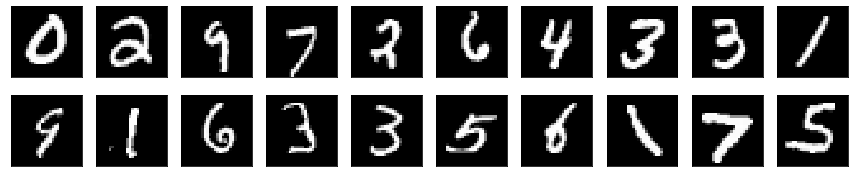

In [7]:
train_loader, test_loader = get_MNIST_data_normalized(args, use_cuda)
display_MNIST(train_loader)

<h1 style="color:rgb(208,90,80)">Tasks </h1>

<h4 style="color:rgb(208,90,80)">
Design your own generator network. I suggest a four layer network with 3 times relu activation function and a tanh activation function at the end. The input dimension should be "z_latent" and the output dimension should be "g_output_dim". <br><br>
Try to design your network such that you get reasonable good generated images. <br><br>    

In [11]:
# Build GAN network
z_latent = 100
args.epochs = 20
args.lr = 0.0002
mnist_dim = train_loader.dataset.data.size(1) * train_loader.dataset.data.size(2)

In [12]:
class your_Generator(nn.Module):
    def __init__(self, g_input_dim, g_output_dim):
        super(your_Generator, self).__init__()
        
        #YOUR CODE
        self.linear1 = nn.Linear(z_latent, 16)
        self.linear2 = nn.Linear(16, 28)
        ## decoder layers ##
        self.linear3 = nn.Linear(28, 14)
        self.linear4 = nn.Linear(14, g_output_dim)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = torch.tanh(self.linear4(x))
        return x
        #YOUR CODE
        
# Four layers, 3x relu, 1 tanh act., input z latent, output  g output dim

In [13]:
G = your_Generator(g_input_dim = z_latent, g_output_dim = mnist_dim).to(device)
D = Discriminator(d_input_dim = mnist_dim).to(device)

In [14]:
G

your_Generator(
  (linear1): Linear(in_features=100, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=28, bias=True)
  (linear3): Linear(in_features=28, out_features=14, bias=True)
  (linear4): Linear(in_features=14, out_features=784, bias=True)
)

In [15]:
# loss
criterion = nn.BCELoss()
 
G_optimizer = optim.Adam(G.parameters(), lr = args.lr)
D_optimizer = optim.Adam(D.parameters(), lr = args.lr)

In [16]:
for epoch in range(1, args.epochs+1):           
    D_losses, G_losses = [], []
    for x, _ in train_loader:
        D_losses.append(train_discriminator(x, D, G, input_dim, args.batch_size, criterion, z_latent, D_optimizer, device))
        G_losses.append(train_generator(D, G, args.batch_size, criterion, z_latent, G_optimizer, device))

    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch), args.epochs, torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))))
    
    with torch.no_grad():
        test_z = Variable(torch.randn(args.batch_size, z_latent).to(device))
        generated = G(test_z)
        save_image(generated.view(generated.size(0), 1, 28, 28), os.path.join('.','samples','GAN_your_sample_{}.png'.format(epoch)))

print("Done")

[1/20]: loss_d: 0.040, loss_g: 9.722
[2/20]: loss_d: 0.019, loss_g: 8.573
[3/20]: loss_d: 0.016, loss_g: 7.876
[4/20]: loss_d: 0.010, loss_g: 7.460


KeyboardInterrupt: 